# Text Analysis for Digital Humanities: Introduction

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Understand preprocessing and tokenization as preparatory steps in text analysis.
* Use the NLTK library to analyze the characteristic speech patterns of narrators in a play.
* Use TF-IDF to explore which plays are the most similar to each other.
* Use the Scikit-Learn library to explore prevalent topics or motifs in a play across narrative time.
* Use the Spacy library to do Named Entity Recognition, exploring how often certain times of day, places, or people are mentioned in a play.

</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

### Sections
1. [Introduction to Text Analysis](#intro)
2. [Tokenizing Text](#token)
3. [NLTK - Natural Language Toolkit](#nltk)
4. [Comparative Stylometry Using TF-IDF with Scikit-Learn](#tfidf)
5. [Named Entity Recognition With SpaCy](#ner)
6. [Topic Modeling With Gensim](#topic)

<a id='intro'></a>
# Introduction to Text Analysis

Text analysis techniques lie in the domain of Natural Language Processing, where we apply computational techniques to human languages in order to explain underlying structures.

Performing computational methods on natural language is a question of representations. Language is understandable to humans because it is a system of communication tailored to our cognitive abilities, enabling us to encode and decode complex information through shared symbols and rules.

However, most machine learning and data science techniques utilize numerical methods to extract patterns from large datasets. This means we need to find a way to convert the language into a numerical representation. 

In this notebook, we will cover a variety of steps to "preprocess" and create numerical representations of text in order to do computational work.

<a id='token'></a>
# Tokenizing Text

Tokenization involves breaking down text into smaller units, such as words or phrases, to facilitate further analysis or processing in natural language tasks.

Recall a string in Python looks like this:

In [1]:
text = "I'm not superstitious. I have read a heap of books in my time. I am a scholar in my own way"

We can use the `.split()` method on a string to split it on a particular text character. By default, this is a whitespace, but `.split()` can also take other characters like a period (`.`).

Let's first split our string up in sentences.

In [2]:
sents = text.split('.')
sents

["I'm not superstitious",
 ' I have read a heap of books in my time',
 ' I am a scholar in my own way']

Note that the output of `.split()` is a list.

Now, let's split those sentences up into individual words. This means we have to apply `.split()` again to **each item in our list**. 

🔔 **Question**: Conceptually, can you explain how this loop comes to its output?

In [3]:
tokens = []
for sent in sents:
    tokens.append(sent.split())

tokens

[["I'm", 'not', 'superstitious'],
 ['I', 'have', 'read', 'a', 'heap', 'of', 'books', 'in', 'my', 'time'],
 ['I', 'am', 'a', 'scholar', 'in', 'my', 'own', 'way']]

Because we are splitting up the items in our `sents` list further, we now have a **list of lists**. You can tell by the double `[[` and `]]` brackets at the start and end of `tokens`. 

By the way, we can access a token from this list of lists using double indexing:

In [4]:
tokens[1][1]

'have'

<a id='nltk'></a>
# NLTK - Natural Language Toolkit

It is useful to know how splitting up words using `.split()` works--but in practice, we do not work like this. Python has access to many Natural Language Processing (NLP) packages that have built-in tokenization methods that are more sophisticated, and easier to use.

Let's have a look at NLTK--the Natural Language Toolkit--which is a often-used package in the aacademic community for NLP work. First, we have to install it, as well as some dependencies.

In [5]:
%pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Now, we can use the `.sent_tokenize()` method in NLTK to easily tokenize sentences:

In [6]:
nltk.sent_tokenize(text)

["I'm not superstitious.",
 'I have read a heap of books in my time.',
 'I am a scholar in my own way']

Or we can use `.word_tokenize()` to tokenize words.

In [7]:
nltk.word_tokenize(text)

['I',
 "'m",
 'not',
 'superstitious',
 '.',
 'I',
 'have',
 'read',
 'a',
 'heap',
 'of',
 'books',
 'in',
 'my',
 'time',
 '.',
 'I',
 'am',
 'a',
 'scholar',
 'in',
 'my',
 'own',
 'way']

Notice what happens there with "I'm"? What if our sentence contains a contraction? 

In [8]:
nltk.word_tokenize("I can't believe this!")

['I', 'ca', "n't", 'believe', 'this', '!']

🔔 **Question**: Why do you think NLTK is splitting up "ca" and "n't"?

## Stems and Stemming

Stemming is a text preprocessing technique that reduces words to their root form by removing prefixes and suffixes, often resulting in a basic, but sometimes grammatically incorrect, word form.

To stem a word, we first have to **instantiate**, or make a fresh copy of, our stemmer object: 

In [9]:
stemmer = nltk.stem.LancasterStemmer()

Now let's test it on three different forms of the same stem: 

In [10]:
for word in ["believe", "belief", "believing"]:
    print(stemmer.stem(word))

believ
believ
believ


In [11]:
stemmer.stem("believe")

'believ'

## Lemmas and Lemmatizers

A lemma is the "dictionary form" of a word, so the lemma for "jumps" is "jump." Lemmatizing often doesn't transform the text as much as stemming. First, instantiate the lemmatizer: 

In [12]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [13]:
lemmatizer.lemmatize("believe")

'believe'

In [14]:
for word in ["believe", "belief", "believing"]:
    print(lemmatizer.lemmatize(word))

believe
belief
believing


In [15]:
for word in ["happy", "happier", "happiest"]:
    print(lemmatizer.lemmatize(word))

happy
happier
happiest


In [16]:
for word in ["jumps", "jumping", "jump"]:
    print(lemmatizer.lemmatize(word))

jump
jumping
jump


In [17]:
for sentence in tokens:
    for token in sentence:
        print(lemmatizer.lemmatize(token))

I'm
not
superstitious
I
have
read
a
heap
of
book
in
my
time
I
am
a
scholar
in
my
own
way


## Things To Do With NLTK Text Objects

The NLTK Text object provides a convenient interface for exploring and analyzing a text.

Essentially, you feed it a text file (which takes the form of a string in Python), and it processes this text so that you can call a bunch of methods on that new object. It allows you to do things like concordancing, look for similar words to an input word, and show dispersion plots for given words. 

Let's have a look:

In [18]:
file_path = '../data/1895_wilde-oscar_the-importance-of-being-earnest.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [19]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Assuming 'text' is your corpus as a single string
# Tokenize the corpus
tokens = word_tokenize(text)
# Create an NLTK Text object
nltk_text = Text(tokens)

# Example operations:
# 1. Concordance
print("Concordance for the word 'brother':")
nltk_text.concordance('brother')

Concordance for the word 'brother':
Displaying 25 of 51 matches:
 always pretended to have a younger brother of the name of Ernest , who lives i
have invented a very useful younger brother called Ernest , in order that you m
 accepts me , I am going to kill my brother , indeed I think I 'll kill him in 
en propose for practice . I know my brother Gerald does . All my girl-friends t
nsense . Algernon : What about your brother ? What about the profligate Ernest 
! Jack : Very well , then . My poor brother Ernest was carried off suddenly , i
le too much interested in your poor brother Ernest ? Wo n't she feel his loss a
ts , that unfortunate young man his brother seems to be . But I must not distur
4 , The Albany , W. ' Uncle Jack 's brother ! Did you tell him Mr. Worthing was
 from your card , are Uncle Jack 's brother , my cousin Ernest , my wicked cous
 some terrible calamity ? Jack : My brother . Miss Prism : More shameful debts 
ack : [ -- ] Dead ! Chasuble : Your brother Ernest dead

In [20]:
# 2. Similar words
print("\nWords similar to 'brother':")
nltk_text.similar('brother')


Words similar to 'brother':
name case man moment room music for but two way little pleasure county
aunt well being doubt matter place hard


In [21]:
# 3. Collocations
print("\nCollocations in the text:")
nltk_text.collocations()


Collocations in the text:
Lady Bracknell; Miss Prism; Mr. Worthing; Aunt Augusta; Miss Fairfax;
Miss Cardew; Uncle Jack; cigarette case; Dr. Chasuble; dear fellow;
Good heavens; LADY BRACKNELL; n't think; severe chill; cucumber
sandwiches; MISS PRISM; Lord Bracknell; need hardly; Mr. Bunbury;
three months



Dispersion plot for words 'brother', 'Gerald', and 'Ernest':


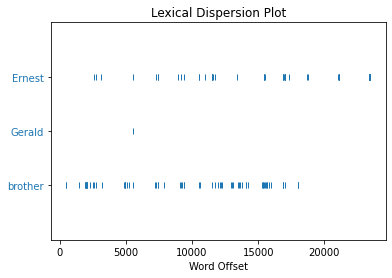

In [22]:
# 4. Dispersion Plot
print("\nDispersion plot for words 'brother', 'Gerald', and 'Ernest':")
nltk_text.dispersion_plot(['brother', 'Gerald', 'Ernest'])

<a id='tfidf'></a>

# Comparative stylometry using TF-IDF with Scikit-Learn

## Counting Words

A useful thing to know is how often a word shows up in a corpus. We can use the `CountVectorizer` object from the `Scikit-Learn` package for this.

Let's read in some plays using a custom function:

In [23]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

boucicault_grimaldi = read_file('../data/1853_boucicault-dion_grimaldi.txt')
boucicault_phantom = read_file('../data/1856_boucicault-dion_the-phantom.txt')
yeats = read_file('../data/1919_yeats-wb_the-only-jealousy-of-emer.txt')
wilde = read_file('../data/1895_wilde-oscar_the-importance-of-being-earnest.txt')
shaw = read_file('../data/1895_shaw-george-bernard_you-never-can-tell.txt')

First, we instantiate our CountVectorizer() object. Then, we read in our collection of plays using the `fit_transform` method. It does 2 things:

1. Counts all terms in the total vocabulary of our corpus.
2. Creates a matrix of term counts for each document in the corpus.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the documents
count_matrix = count_vectorizer.fit_transform([boucicault_grimaldi, boucicault_phantom, yeats, wilde, shaw])

The `count_vectorizer` object now knows how often each word in the total vocabulary of our corpus occurs. We can get this information using the `.vocabulary_` attribute:

In [25]:
count_vectorizer.vocabulary_

{'act': 77,
 'scene': 5559,
 'handsomely': 2946,
 'furnished': 2695,
 'saloon': 5518,
 'in': 3282,
 'hotel': 3144,
 'at': 435,
 'nottingham': 4333,
 'julia': 3568,
 'apartment': 307,
 'window': 7091,
 'with': 7112,
 'balcony': 516,
 'centre': 1016,
 'doors': 1937,
 'door': 1936,
 'an': 269,
 'elegant': 2089,
 'deshabille': 1745,
 'is': 3491,
 'discovered': 1841,
 'table': 6332,
 'writing': 7178,
 'music': 4204,
 'repeating': 5302,
 'as': 396,
 'she': 5729,
 'writes': 7177,
 'my': 4211,
 'dear': 1634,
 'sharp': 5722,
 'am': 245,
 'now': 4339,
 'playing': 4733,
 'success': 6207,
 'has': 2973,
 'been': 590,
 'unprecedented': 6765,
 'prisoner': 4918,
 'here': 3049,
 'for': 2589,
 'another': 290,
 'week': 7017,
 'so': 5903,
 'cannot': 941,
 'appear': 324,
 'drury': 2003,
 'lane': 3654,
 'theatre': 6417,
 'until': 6784,
 'next': 4277,
 'month': 4133,
 'knocks': 3616,
 'come': 1240,
 'enter': 2176,
 'waiter': 6940,
 'salver': 5521,
 'on': 4423,
 'which': 7044,
 'are': 357,
 'three': 6460,
 'c

Let's now have a look at the matrix of counts that we generated. We'll put them in a Pandas Dataframe for readability:

In [26]:
import pandas as pd

pd.DataFrame(count_matrix.todense(), columns=count_vectorizer.get_feature_names_out())

,10,104,12,149,14th,1645,1750,1860,1896,1what,...,yours,yourself,yourselves,youth,yrs,ze,zem,zj,ça,émotion
0,1,0,0,0,0,0,0,0,0,1,...,9,9,2,0,1,1,2,1,2,1
1,0,0,0,0,0,1,1,0,0,0,...,3,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
3,0,1,0,2,2,0,0,0,0,0,...,4,2,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,1,1,0,...,10,16,0,4,0,0,0,0,0,0


🔔 **Question**: Can you explain what this matrix is representing?

## TF-IDF

A more informative metric might be how often a term appears in one text, **as opposed to in other texts**.

**TF-IDF**: Term frequency, adjusted for inverse document frequency. 
 - Term frequency: the frequency with which words occur in your text
 - Inverse document frequency: the frequency with which words occur in your corpus. 

Or, a fancy way of getting distinguishing words of a document. 

Let's try it. We'll use Scikit-Learn's `TfidfVectorizer` object this time. Note that we set `max_features` to 800, meaning we only will take the top-800 words from our vocabulary based on how often they appear.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=800)

In [28]:
tfidf_matrix = tfidf.fit_transform([boucicault_grimaldi, boucicault_phantom, yeats, wilde, shaw])

Now let's turn this matrix into a DataFrame as well. We'll add index labels for the different texts we're comparing for clarity.

In [29]:
pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names_out(),
             index=['Boucicault_Grimaldi', 'Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'])

,able,about,absurd,accept,across,act,ada,afraid,after,afternoon,...,years,yes,yet,yonder,you,young,younger,your,yours,yourself
Boucicault_Grimaldi,0.002225,0.007915,0.001340,0.003743,0.001872,0.020589,0.000000,0.002808,0.003166,0.000000,...,0.004749,0.029947,0.006332,0.000000,0.332443,0.009498,0.000000,0.112397,0.008423,0.007124
Boucicault_Phantom,0.000000,0.004536,0.000000,0.001341,0.001341,0.006704,0.166585,0.000000,0.011340,0.000000,...,0.009072,0.022792,0.006804,0.035697,0.209786,0.007938,0.003188,0.063503,0.004022,0.001134
Yeats,0.000000,0.011357,0.000000,0.000000,0.000000,0.000000,0.000000,0.013427,0.011357,0.000000,...,0.002839,0.000000,0.014196,0.000000,0.187386,0.008518,0.000000,0.102211,0.000000,0.002839
Wilde,0.005555,0.035007,0.010516,0.000668,0.002670,0.004005,0.000000,0.010014,0.015245,0.015296,...,0.006776,0.040055,0.002823,0.000000,0.287963,0.010163,0.003968,0.071144,0.002670,0.001129
Shaw,0.002631,0.018407,0.000000,0.001844,0.002582,0.004058,0.000000,0.005533,0.011856,0.003169,...,0.004992,0.038363,0.006240,0.000000,0.290461,0.023399,0.002631,0.062086,0.003689,0.004992


## Stylometry?

Stylometry is the "measurement of style." It's a way to show how the style of writers is similar or different. We can use our TF-IDF values, as well as a technique called Principle Component Analysis (PCA), to do this.

In [30]:
from sklearn.decomposition import PCA

pca = PCA(2)

In [31]:
import numpy as np

tfidfArray = np.asarray(tfidf_matrix.todense())

Recall that `tfidfArray` represents the TF-IDF values of terms in different documents. Each row in the array corresponds to a document, and each column corresponds to a unique term (or 'feature') in the entire collection of documents. Recall that we have TF-IDF values for the top-800 terms. 

If we only had 2 features, we could visualize the relations between these features in a 2D graph. But we can't visualize something with 800 dimensions.

This is where Principle Component Analysis (PCA) Comes in. Essentially, it converts the correlations (or lack thereof) among all the features into a 2D graph. (If you want to learn more about how it does this, [this video](https://www.youtube.com/watch?v=FgakZw6K1QQ) explains it well.)

Before applying PCA, it's usually recommended to **normalize** the data to have a mean of zero and a standard deviation of one. This is important because PCA is sensitive to the scale of the data, and normalizing ensures that each feature contributes equally to the analysis. We can  do this using Scikit-Learn's `StandardScaler` object.

In [32]:
from sklearn.preprocessing import StandardScaler
# Normalize the TF-IDF array
scaler = StandardScaler()
tfidfArray_normalized = scaler.fit_transform(tfidfArray)

Let's have another look at the values:

In [33]:
pd.DataFrame(tfidfArray_normalized, columns=tfidf.get_feature_names_out(),
             index=['Boucicault_Grimaldi', 'Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'])

,able,about,absurd,accept,across,act,ada,afraid,after,afternoon,...,years,yes,yet,yonder,you,young,younger,your,yours,yourself
Boucicault_Grimaldi,0.069572,-0.696745,-0.251154,1.745558,0.183020,1.906574,-0.5,-0.733466,-1.862047,-0.622791,...,-0.445222,0.256164,-0.253212,-0.5,1.304659,-0.414696,-1.183652,1.440061,1.710522,1.583797
Boucicault_Phantom,-1.014718,-1.009469,-0.577599,-0.140072,-0.360707,-0.051820,2.0,-1.313727,0.187328,-0.622791,...,1.610159,-0.237087,-0.127071,2.0,-0.954469,-0.683785,0.744003,-0.896905,0.095924,-0.993970
Yeats,-1.014718,-0.378278,-0.577599,-1.192296,-1.733681,-0.997335,-0.5,1.461439,0.191576,-0.622791,...,-1.353405,-1.808440,1.849944,-0.5,-1.367041,-0.583824,-1.183652,0.953181,-1.379901,-0.260117
Wilde,1.692435,1.810318,1.983951,-0.668370,1.000855,-0.432384,-0.5,0.755905,1.166500,1.956680,...,0.518322,0.953012,-1.191718,-0.5,0.485421,-0.300017,1.215903,-0.531696,-0.400107,-0.995998
Shaw,0.267429,0.274175,-0.577599,0.255180,0.910513,-0.425035,-0.5,-0.170151,0.316643,-0.088308,...,-0.329852,0.836351,-0.277943,-0.5,0.531431,1.982323,0.407398,-0.964641,-0.026438,0.666288


Note how the values for each term have changed.

Now, it's time to use PCA (also imported from Scikit-Learn):

In [34]:
pcaOut = pca.fit_transform(tfidfArray_normalized)

In [35]:
pcaOut

array([[  0.96144178,  16.41830957],
       [  6.12785763,  18.31265007],
       [ 27.55784473, -16.79379481],
       [-20.50477445, -12.75055822],
       [-14.1423697 ,  -5.18660661]])

Note that this array only has 2 dimensions for each data point / text. That means we can visualize it in a 2D plot. We will use the `matplotlib` package for this.

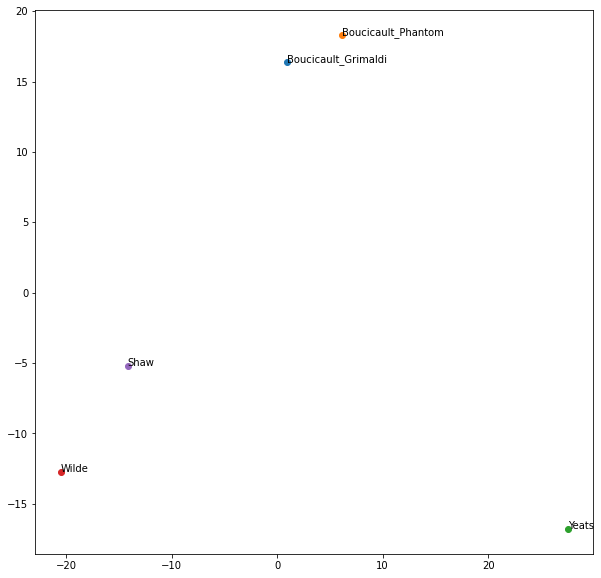

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(['Boucicault_Grimaldi','Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'][i], (xs[i], ys[i]))

<a id='ner'></a>
# Named Entity Recognition With SpaCy

SpaCy is a natural language processing library, similar to the NLTK in some respects, but with many notable differences. 
 - Where the NLTK is meant for teaching and learning natural language processing, SpaCy is designed for industrial applications (i.e. designed for speed and accuracy, not necessarily ease-of-use). 
 - Instead of performing each function separately (`word_tokenize`, `pos_tag`, `lemmatize`), SpaCy does everything all at once. This has advantages and disadvantages. For example, processing with SpaCy takes a long time. But once a text is processed, no further processing is necessary—it just becomes a matter of accessing the data that's already there. 
 - Because SpaCy stores a *lot* of data about each text, this can easily lead to memory overflow errors. An easy way around this is to break the text up into individual parts, and to use functions wherever possible, to limit the amount of data stored in memory. It helps if you have a computer with a lot of RAM. You can also randomly sample chunks of text (like 1000-word chunks) at a time, and then take the average of all your random trials at the end. 
 - While the NLTK's natural language processing is deterministic (built on human understanding of how language works), it's not quite as accurate as SpaCy's probabilistic (built on machine understanding of language) approach. 
 
At the moment, SpaCy is the fastest, and almost the most accurate parser available. 

First, load your language model, and store it as the variable `nlp`, which can then be run as a function: 
   

In [37]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 32.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Now let's get a text to play around with.

Process it using SpaCy: 

In [38]:
doc = nlp(wilde)

### Exploring our SpaCy Doc

Now we can start to explore what we can do with the resulting Doc object: 

In [39]:
type(doc)

spacy.tokens.doc.Doc

Here are some things that we can do with this object: 

In [40]:
[method for method in dir(doc) if not method.startswith('_')]

['cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_ents',
 'set_extension',
 'similarity',
 'spans',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_dict',
 'to_disk',
 'to_json',
 'to_utf8_array',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

We can also get the length (in tokens) of the text: 

In [41]:
len(doc)

24782

SpaCy allows us to iterate over the text's words, as if the Doc were a list of tokens: 

In [42]:
for word in doc[40:50]:
    print(word)

Lane
is
arranging
afternoon
tea
on
the
table
,
and


We can get a single word, too, so that we can do things with that individual word (token): 

In [43]:
arranging = doc[42]
arranging

arranging

### Exploring SpaCy Words

SpaCy words are *objects*, rather than strings, and so they contain a lot of information that can be accessed via their many methods. Here are a few things you can do with them: 

In [44]:
[method for method in dir(arranging) if not method.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'morph',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'set_morph',
 'shape',
 'sh

You can get the word's POS (as in the NLTK's `pos_tag()` function), like this: 

In [45]:
arranging.tag_

'VBG'

Or a less specific tag (`VERB`, `NOUN`, `PUNCT`, etc.), like this: 

In [46]:
arranging.pos_

'VERB'

(`.tag` and `.pos`, without the underscores, are numeric representations of these. You can use those if you don't care about human readability, and want your code to be a little faster.)

You can also get the lemma for the word, which is its "dictionary form": 

In [47]:
arranging.lemma_

'arrange'

With punctuation, like this comma, you can see how the `.tag` and the `.pos` properties differ: 

One caveat: the word *object* is distinct from the word's string, so to count these, or otherwise treat them as strings, we first have to extract their text: 

## Named Entity Recognition

Named entity recognition, or NER, is a subfield of natual language processing that deals with the automatic identification of people, places, things, and other related "names." This sometimes includes numbers, dates, and other things. You can tell whether a word is a named entity, and if so, what type of entity it is, like this: 

In [48]:
arranging.ent_type_

''

Explore the types of entities in a subset of words of our text: 

In [49]:
for word in doc[50:250]: 
    if len(word.text.strip()) > 0 and len(word.ent_type_) > 0: 
        print(word.text.strip(), ':', word.ent_type_)

Lane : PERSON
Lane : PERSON
Lane : PERSON
Lady : PERSON
Bracknell : PERSON
Lane : PERSON
two : CARDINAL
Lane : PERSON
Thursday : DATE
night : TIME
eight : CARDINAL
Lane : PERSON
eight : CARDINAL


We can extract places like this: 

In [50]:
for word in doc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'GPE': 
            print(word)

Shropshire
Shropshire
Gwendolen
Gwendolen
Gwendolen
Cecily
Cecily


And times like this: 

In [51]:
for word in doc[:4000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'TIME': 
            print(word)

Morning
afternoon
night
five
o'clock
tonight
tonight
ten
minutes
afternoon


Alternatively, we can write this as a list comprehension: 

In [52]:
times = [word.text for word in doc if word.ent_type_ == 'TIME']

In [53]:
type(times)

list

We can count our list of times, put this into a Pandas Series, and plot them, to try to show what kinds of times occur most often in Betteredge's narrative: 

<Axes: >

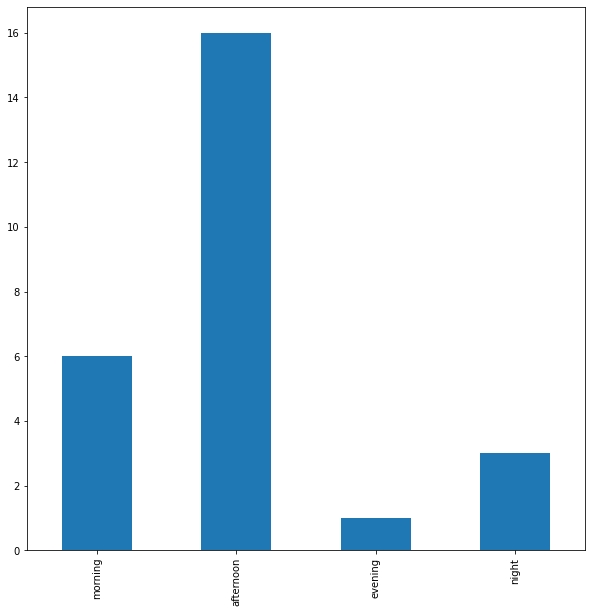

In [54]:
from collections import Counter

pd.Series(Counter(times))[['morning', 'afternoon',
                           'evening', 'night']].plot(kind='bar')

And we can also see how frequently times and dates occur in narrative time. 

<Axes: >

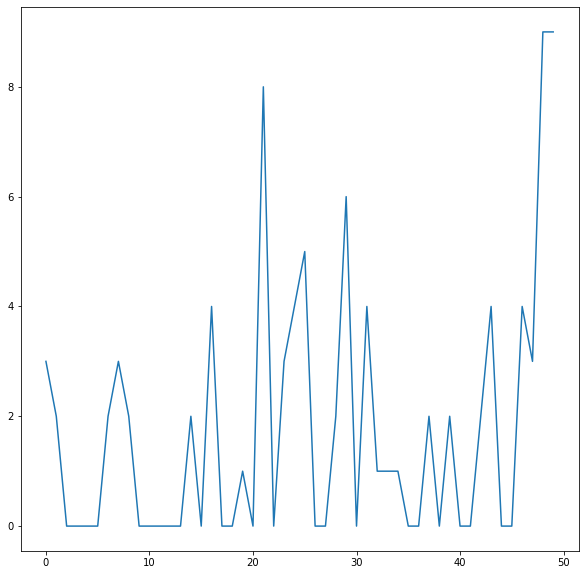

In [55]:
times = pd.Series(np.histogram([word.i for word in doc if word.ent_type_ == 'TIME'], bins=50)[0])
times.plot()

<a id='topic'></a>
# Topic Modeling with Gensim

Topic modeling is the umbrella term for several statistical methods that show coocurrences of groups of words irrespective of their positions in the text. These groups, or "topics," are computationally inferred probabilistically, not semantically, and so even though they are called topics, they don't always correspond to what we would consider a topic. 

A good, general-purpose introduction to topic modeling [can be found here](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf) via David Blei's website.

We will use Gensim, a machine learning package in Python, to do the topic modeling.

Let's do topic modeling on the works of Boucicault, which are sorted by year in the `data/boucicault` folder in this repo. This little custom function reads in all the .txt files and adds them to one long Python string.

In [56]:
import os

def read_file(file_path):
    data = ""
    for filename in os.listdir(file_path):
        with open(file_path + filename, 'r', encoding='utf-8') as file:
            data += file.read()
    return data
    
boucicault = read_file('../data/boucicault/')

How many tokens do we have (more or less)? Let's use `.split()` again:

In [57]:
len(boucicault.split())

153401

Okay, let's create a topic model.

Topic modeling is very sensitive to lots of factors. First, it works best on many documents rather than just a few, since a topic is defined as that which is distributed across documents. So it's a good idea to break a text into equal-sized chunks, first. 

I'll start by defining a `split_text_into_chunks()` function to do that, to break up a text into chunks of 3k words each. 

In [79]:
def split_text_into_chunks(text, chunk_size=3000):
    # Split the text into words
    words = text.split()
    
    # Calculate the number of chunks
    num_chunks = len(words) // chunk_size + (1 if len(words) % chunk_size > 0 else 0)
    
    # Split the words into chunks of the specified size
    chunks = [" ".join(words[i*chunk_size:(i+1)*chunk_size]) for i in range(num_chunks)]
    
    return chunks

b_chunks = split_text_into_chunks(boucicault)

In [80]:
len(b_chunks)

52

We first want to remove **stopwords**--a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc. (See a list of the stopwords used by Gensim [here](https://github.com/piskvorky/gensim/blob/develop/gensim/parsing/preprocessing.py).)

After this preprocesing step, we create a `Dictionary` (Gensim's method to create a mapping between words and their integer IDs). We then run the `.doc2bow` method to create a list of token IDs and their respective counts.

In [81]:
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.utils import simple_preprocess
import nltk
nltk.download('averaged_perceptron_tagger')

# Tokenize and preprocess documents
def preprocess(text):
    return [word for word in simple_preprocess(text) if word not in STOPWORDS]

# Preprocess the documents
processed_docs = [preprocess(doc) for doc in b_chunks]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Create a bag-of-words model for each document
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Have a look at the ID mappings of a term: 

In [82]:
dictionary.token2id['able']

0

...and the counts of each of these IDs:

In [83]:
bow_corpus

[[(0, 2),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 3),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 7),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 17),
  (33, 3),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 4),
  (39, 2),
  (40, 3),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 73),
  (70, 4),
  (71, 1),
  (72, 6),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 3),
  (83, 1),
  (84, 3),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 2),
  (90, 1),
  (91, 

Let's train a topic model. This machine learning model will iterate over all our text chunks, looking at words that appear in each other's vicinity.

The model outputs a set of topics, where each topic is a distribution over words in the vocabulary, indicating the likelihood of each word belonging to that topic. Additionally, it assigns each document (in this case, a text chunk) in the corpus a distribution over these topics, showing the proportion of the document that pertains to each topic.

In [84]:
from gensim.models import LdaModel

# Number of topics
num_topics = 3

lda_model = LdaModel(corpus=bow_corpus,   # stream of document vectors or sparse matrix of shape
            id2word=dictionary,           # mapping from word IDs to words (for determining vocab size)
            num_topics=num_topics,        # amount of topics
            random_state=100,             # seed to generate random state; useful for reproducibility
            passes=20,                    # amount of iterations/epochs 
            per_word_topics=False)        # computing most-likely topics for each word 


We can check out the most-relevant words for our topics.

The "scores" for the top words in a topic represent the probability or relevance of each word to that topic. In other words, they indicate how important a word is for describing the topic, (hopefully) helping us to interpret the themes or subjects the topic covers.

In [97]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.010*"goodge" + 0.009*"miss" + 0.009*"nat" + 0.009*"ll" + 0.007*"oh" + 0.007*"enter" + 0.007*"lady" + 0.006*"mo" + 0.006*"tom" + 0.005*"sir"


Topic: 1 
Words: 0.013*"sir" + 0.009*"rose" + 0.008*"violet" + 0.008*"luke" + 0.008*"lord" + 0.008*"lady" + 0.006*"stan" + 0.006*"enter" + 0.006*"shall" + 0.005*"meg"


Topic: 2 
Words: 0.011*"mrs" + 0.011*"sir" + 0.007*"dick" + 0.007*"oh" + 0.007*"jessie" + 0.006*"nettle" + 0.006*"miss" + 0.005*"geordie" + 0.005*"atal" + 0.005*"ll"




Our model has created values representing the percentage degree to which each topic shows up in each document. With some manipulation, we can throw this data into a DataFrame and then plot that DataFrame to visualize how topics show up throughout the years in Boucicault's work.

In [86]:
import pandas as pd

# Initialize an empty list to hold the topic distribution for each document
topics_over_time = []

for document_bow in bow_corpus:
    # Get the topic distribution for the document
    document_topics = lda_model.get_document_topics(document_bow, minimum_probability=0)
    # Convert the topic distribution to a dictionary with topic ID as keys and probability as values
    topic_prob_dict = {topic: prob for topic, prob in document_topics}
    # Append the topic distribution dictionary to the list
    topics_over_time.append(topic_prob_dict)

# Create a DataFrame from the list of topic distribution dictionaries
df_topics_over_time = pd.DataFrame(topics_over_time).fillna(0)  # Fill missing values with 0s

<Axes: >

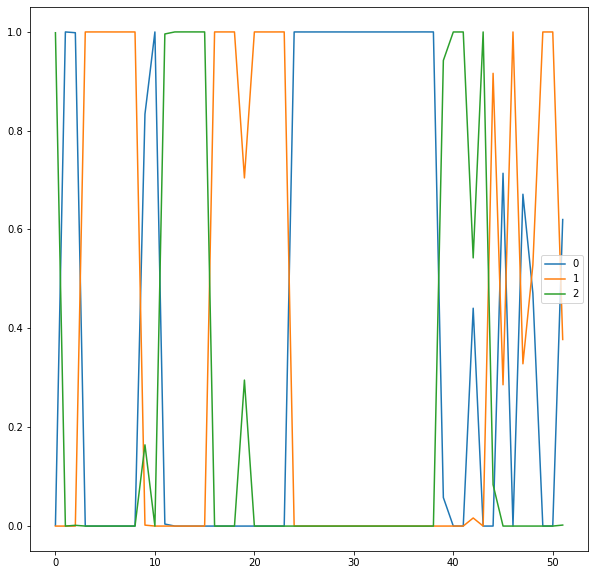

In [87]:
df_topics_over_time.plot()

Finally, we can use a nifty package called `pyLDAvis` which produces an interactive chart to explore topics. 

In [78]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare visualization
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dictionary)

# Display the visualization
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.091748  0.044382       1        1  40.913144
2     -0.001263 -0.090649       2        1  33.920482
0     -0.090486  0.046267       3        1  25.166374, topic_info=          Term        Freq       Total Category  logprob  loglift
318       miss  445.000000  445.000000  Default  30.0000  30.0000
5705    violet  202.000000  202.000000  Default  29.0000  29.0000
3520  tarleton  146.000000  146.000000  Default  28.0000  28.0000
1742      rose  232.000000  232.000000  Default  27.0000  27.0000
9422      stan  224.000000  224.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
296       love   59.342551  244.874093   Topic3  -5.6938  -0.0378
160       exit   57.776437  252.436408   Topic3  -5.7206  -0.0949
264       know   55.799304  281.028459   Topic3  -5.7554  -0.2370
302        man   53.720302  199.954173   Topic3  -5.7934   0.0654
202       good   53.351262  190.962737   Topic3  -5.8003   0.1045

[214 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3996      2  0.890588  achmet
3996      3  0.098954  achmet
5365      2  0.989717     ada
10        1  0.418067      ah
10        2  0.376260      ah
...     ...       ...     ...
574       2  0.447458      ye
574       3  0.141302      ye
577       1  0.489164     yes
577       2  0.260361     yes
577       3  0.252472     yes

[287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

## Interpreting The PyLDAvis Chart

On the left, there is a 2D plot of the "distance" between all of the topics (labeled as the Intertopic Distance Map).  
- Similar topics should appear close together on the plot; dissimilar topics should appear far apart.
- The relative size of a topic's circle in the plot corresponds to the relative frequency of the topic in the corpus.

### Exploring topics and words
You can scrutinize a topic more closely by clicking on its circle, or entering its number in the "selected topic" box in the upper-left.

If you roll your mouse over a term in the bar chart on the right, the topic circles will resize in the plot on the left. This shows the strength of the relationship between the topics and the selected term.

### Salience
On the right, there is a bar chart with the top terms. When no topic is selected in the plot on the left, the bar chart shows the top-30 most salient terms in the corpus. A term's saliency is a measure of both how frequent the term is in the corpus and how "distinctive" it is in distinguishing between different topics.

### Probability Vs Exclusivity
When you select a particular topic, this bar chart changes to show the top-30 most "relevant" terms for the selected topic. The relevance metric is controlled by the parameter λ, which can be adjusted with a slider above the bar chart:

- Setting λ close to 1.0 (the default) will rank the terms according to their probability within the topic.
- Setting λ close to 0.0 will rank the terms according to their "distinctiveness" or "exclusivity" within the topic. This means that terms that occur only in this topic, and do not occur in other topics.
- You can move the slider between 0.0 and 1.0 to weigh term probability and exclusivity.